# Implementing the Ahnert and Payne scheme for a general 1-qubit  POVM on qiskit.



In [1]:
from numpy import pi
import numpy as np
import pandas as pd

import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from qiskit.tools.visualization import circuit_drawer
from qiskit import Aer
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.visualization import plot_histogram


/home/jordan/workspace/qiskit/qiskit_venv/lib/python3.6/site-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


/home/jordan/workspace/qiskit/qiskit_venv/lib/python3.6/site-packages/qiskit/tools/visualization/_circuit_visualization.py:206: DeprecationWarning: The current behavior for the default output will change in a future release. Instead of trying latex and falling back to mpl on failure it will just use "text" by default
  '"text" by default', DeprecationWarning)


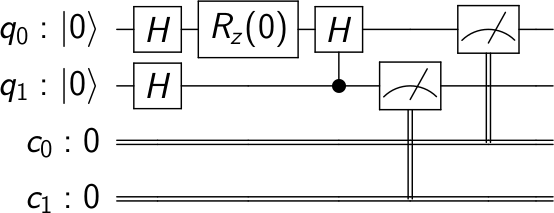

In [2]:
phi = 0

# Create a Quantum Register with 3 qubits.
q = QuantumRegister(2, 'q')

# Create a Quantum Circuit acting on the q register
qc = QuantumCircuit(q)

qc.h(q[0])
qc.h(q[1])
qc.rz(phi, q[0])
qc.ch(q[1],q[0])

# Add Measurements
c = ClassicalRegister(2, 'c')
meas = QuantumCircuit(q, c)
meas.measure(q,c)
qc = qc+meas

circuit_drawer(qc)


### Run the simulator

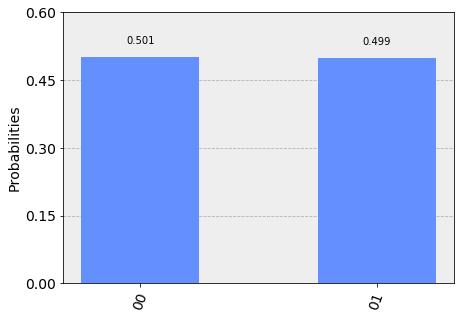

In [5]:
# Run the quantum circuit on a simulator backend
backend = Aer.get_backend('qasm_simulator')
shots = 8096

# Create a Quantum Program for execution 
job = execute(qc, backend, shots = shots)

# execute
result = job.result()

counts = result.get_counts(qc)
plot_histogram(counts)
# counts

### REAL DEVICE EXPERIMENT


In [5]:
IBMQ.load_accounts()

shots = 8192  # Number of shots to run the program (experiment); maximum is 8192 shots.
max_credits = 10  # Maximum number of credits to spend on executions.
n_qubits = 2

large_enough_devices = IBMQ.backends(filters=lambda x: x.configuration().n_qubits >= n_qubits and not x.configuration().simulator) # n_qubits > 5 in order to forece using ibmq16
backend = least_busy(large_enough_devices)
print("The best backend is " + backend.name())



/home/jordan/workspace/qiskit/qiskit_venv/lib/python3.6/site-packages/qiskit/providers/ibmq/ibmqprovider.py:251: UserWarning: Credentials are already in use.
  warnings.warn('Credentials are already in use.')


The best backend is ibmqx4


In [6]:
# <<<<<<<<<<< EXECUTING real experiment >>>>>>>>>>>>>>
run = 1  # keep 0 untill you want to run the experiment, to avoid running by mistake. It is slow and cost credits!
if run:
    job_exp = execute(qc, backend=backend, shots=shots, max_credits=max_credits)
    result = job_exp.result()

KeyboardInterrupt: 

In [ ]:
counts = result.get_counts(qc)
plot_histogram(counts)